In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataA.csv to dataA.csv


In [ ]:
data = pd.read_csv('dataA.csv')
del data['Unnamed: 0']
def CLASS(diagnosis):
  
    if diagnosis == 'M':
        return 1
    if diagnosis == 'B':
        return 0

        
data['Diagnosis_classify'] = data['diagnosis'].apply(CLASS)
dropvar = ['id','diagnosis']
data = data.drop(dropvar, axis = 1)
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis_classify
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [ ]:
H = data[['radius_mean','texture_mean','radius_se','texture_se','radius_worst',
          'concavity_se','symmetry_worst','concave points_se','symmetry_worst']]
U = data[['radius_mean','perimeter_mean','concave points_mean','concavity_mean','radius_worst','perimeter_worst','concave points_worst']]

X = data[['radius_mean','perimeter_mean','concave points_mean','concavity_mean','radius_worst','perimeter_worst','concave points_worst','area_worst','texture_worst']]

y = data[['Diagnosis_classify']]

## **Hypothesis**

## **Logistic Regression**

In [ ]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
X = data[['radius_mean','texture_mean','radius_se','texture_se','radius_worst',
          'concavity_se','symmetry_worst','concave points_se','texture_worst']]
y = data['Diagnosis_classify']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state = 0) #70%train 30%test

scaler = StandardScaler()

X_train_stdA = scaler.fit_transform(X_train)
X_test_stdA = scaler.transform(X_test)

In [ ]:
# import the class (LOG)
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state = 0)

# fit the model with data
logreg.fit(X_train_stdA,y_train)

#
y_pred=logreg.predict(X_test_stdA)
print(y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.94      0.98      0.96        63

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[104   4]
 [  1  62]]
Accuracy: 0.9707602339181286
Precision: 0.9393939393939394
Recall: 0.9841269841269841


## **Cross Validation**

## **Naive Bayes**

In [ ]:
from sklearn.model_selection import train_test_split
X = data[['radius_mean','texture_mean','radius_se','texture_se','radius_worst',
          'concavity_se','symmetry_worst','concave points_se','texture_worst']]
y = data['Diagnosis_classify']
X_train1a,X_test1a,y_train1a,y_test1a = train_test_split(X,y,test_size=0.3, random_state = 0) #70%train 30%test
scaler = StandardScaler()

X_train_stdB = scaler.fit_transform(X_train1a)
X_test_stdB = scaler.transform(X_test1a)

In [ ]:
#Import Gaussian Naive Bayes model (NB)
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train_stdB, y_train1a)

#Predict the response for test dataset
y_pred1a = gnb.predict(X_test_stdB)
print(y_pred1a)
from sklearn.metrics import classification_report
print(classification_report(y_test1a,y_pred1a))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test1a, y_pred1a)
print(cnf_matrix)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1a, y_pred1a))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

[[105   3]
 [  4  59]]
Accuracy: 0.9590643274853801


## **Cross Validation**

In [ ]:
# from sklearn.model_selection import cross_val_score, cross_val_predict

# gnb_acc = cross_val_score(gnb, X_train_std, y_train1a, cv=3, scoring='accuracy', n_jobs=-1)
# gnb_proba = cross_val_predict(gnb, X_train_std, y_train1a, cv=3, method='predict_proba')
# gnb_scores = gnb_proba[:, 1]

# gnb_acc

## **Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
X = data[['radius_mean','texture_mean','radius_se','texture_se','radius_worst',
          'concavity_se','symmetry_worst','concave points_se','texture_worst']]
y = data['Diagnosis_classify']
X_train2a,X_test2a,y_train2a,y_test2a = train_test_split(X,y,test_size=0.3, random_state = 0) #70%train 30%test
scaler = StandardScaler()

X_train_stdC = scaler.fit_transform(X_train2a)
X_test_stdC = scaler.transform(X_test2a)

In [ ]:
#Import Random Forest Model (RF)
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train_stdC,y_train2a)

y_pred2a = rf.predict(X_test_stdC)
print(y_pred2a)
from sklearn.metrics import classification_report
print(classification_report(y_test2a,y_pred2a))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test2a, y_pred2a)
print(cnf_matrix)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2a, y_pred2a))
print("Precision:",metrics.precision_score(y_test2a, y_pred2a))
print("Recall:",metrics.recall_score(y_test2a, y_pred2a))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       108
           1       0.91      1.00      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

[[102   6]
 [  0  63]]
Accuracy: 0.9649122807017544
Precision: 0.9130434782608695
Recall: 1.0


In [ ]:
#Import Random Forest Model (RF)
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train_stdC,y_train2a)

estimator = rf.estimators_[5]


y_pred2a = rf.predict(X_test_stdC)
print(y_pred2a)
from sklearn.metrics import classification_report
print(classification_report(y_test2a,y_pred2a))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test2a, y_pred2a)
print(cnf_matrix)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2a, y_pred2a))
print("Precision:",metrics.precision_score(y_test2a, y_pred2a))
print("Recall:",metrics.recall_score(y_test2a, y_pred2a))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       108
           1       0.91      1.00      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

[[102   6]
 [  0  63]]
Accuracy: 0.9649122807017544
Precision: 0.9130434782608695
Recall: 1.0


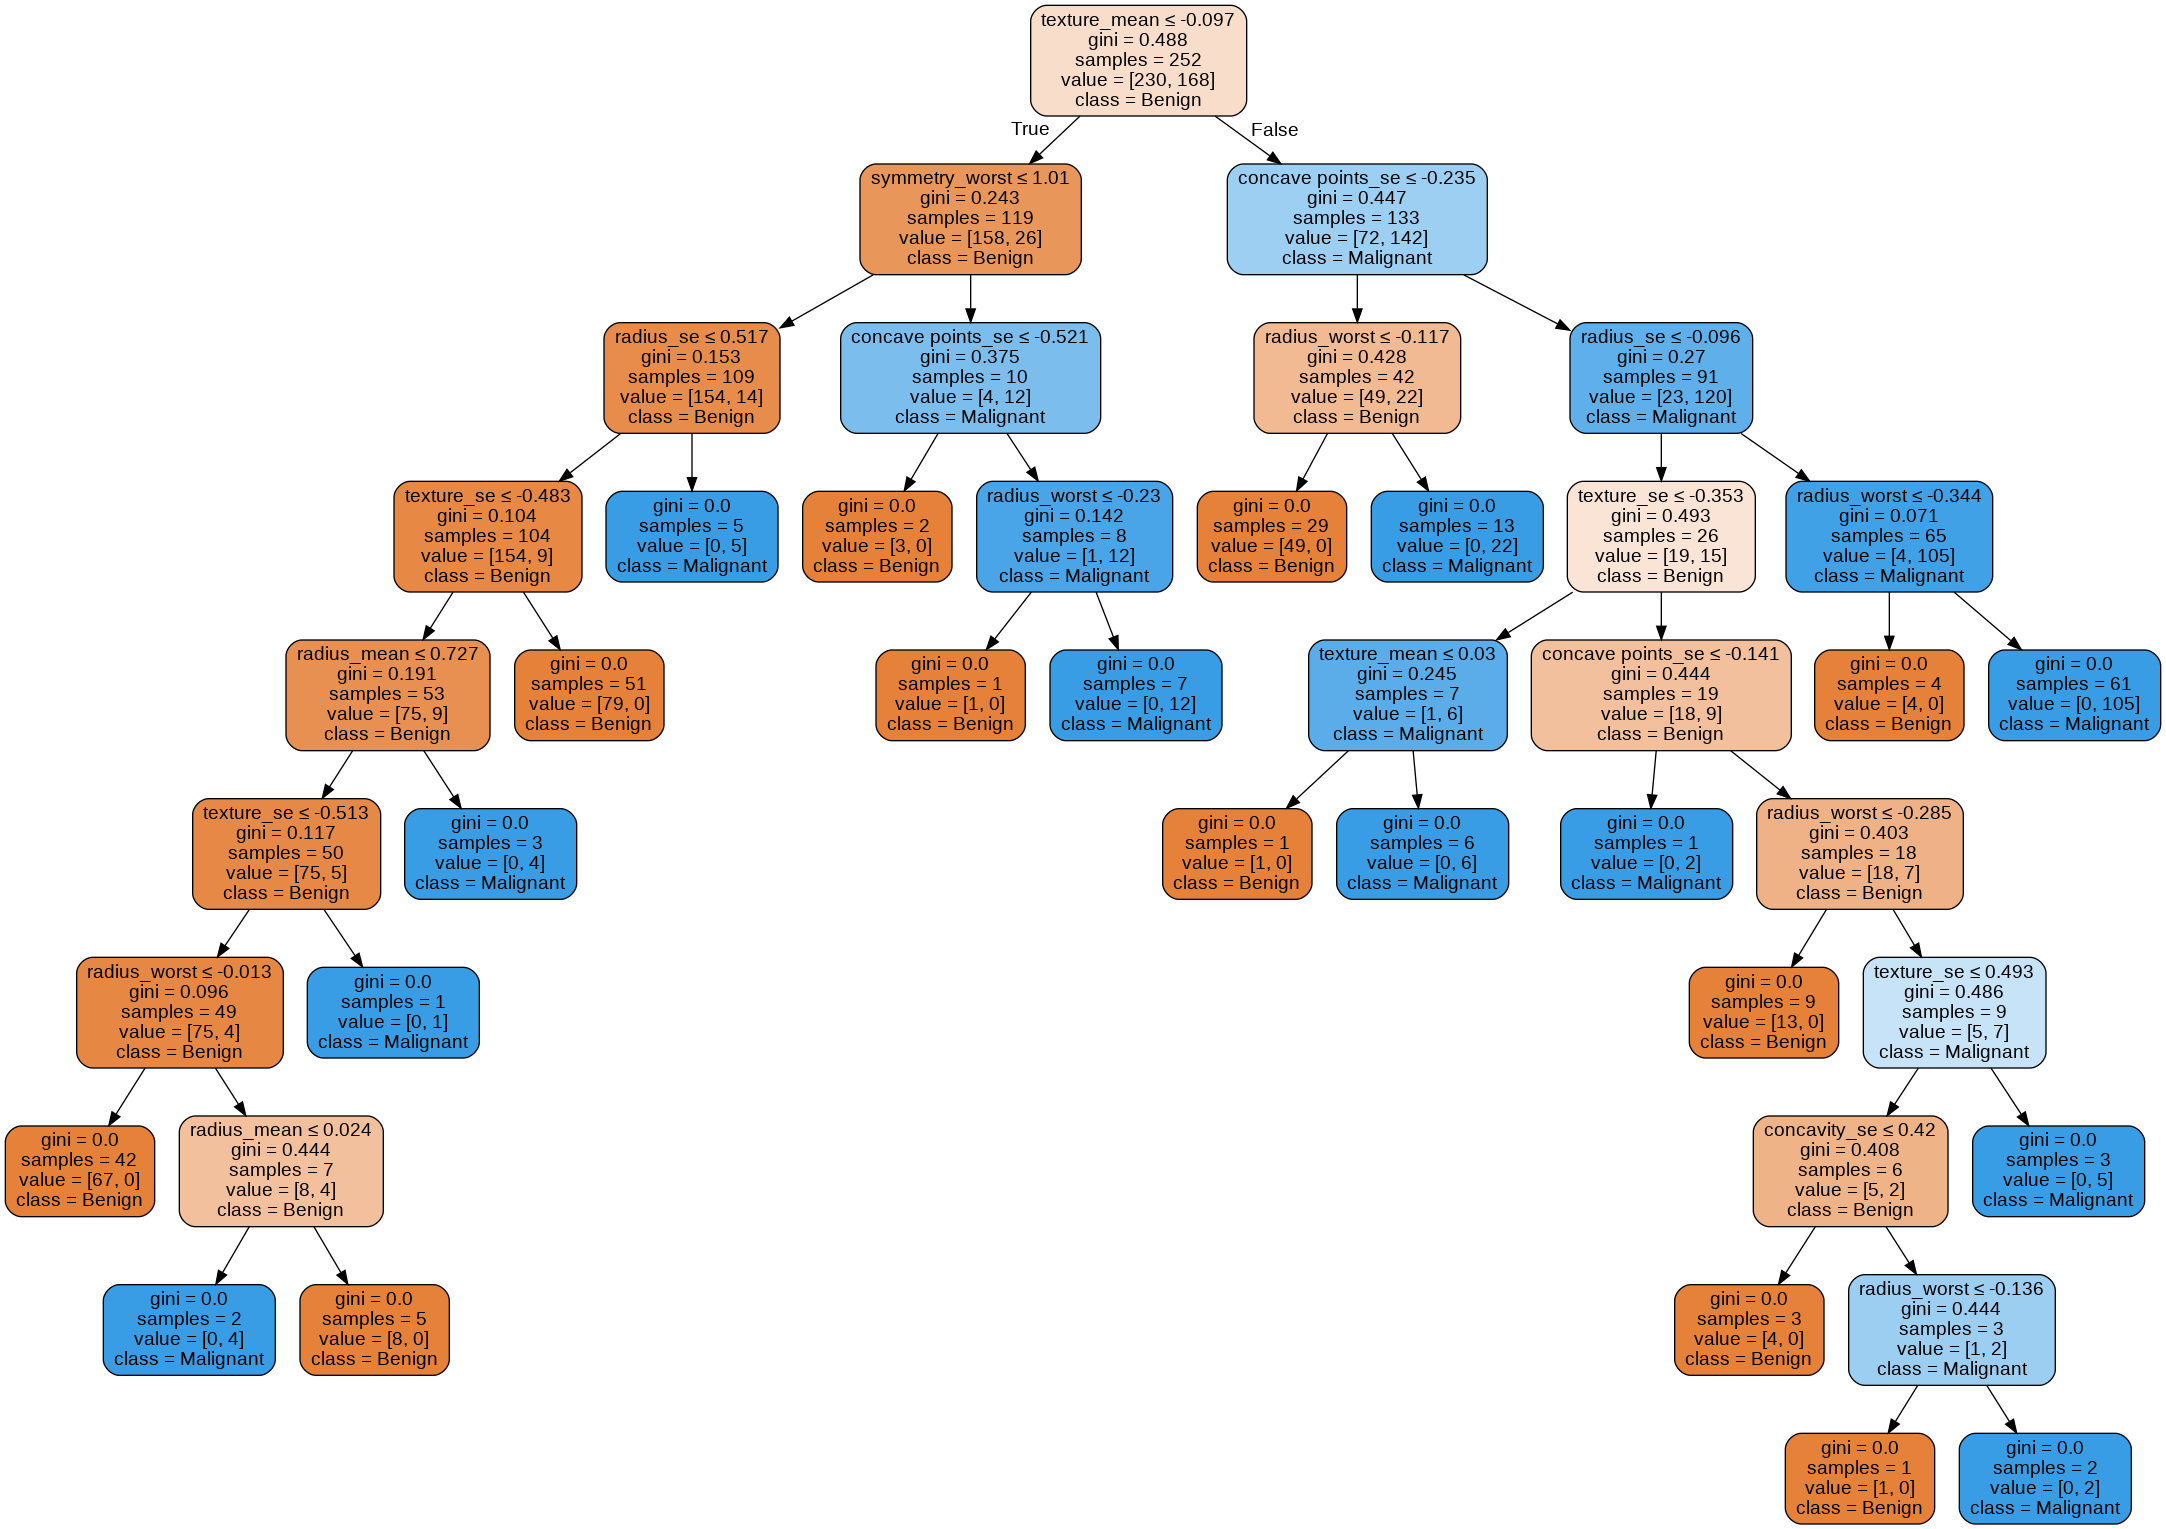

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
feature_names = X.columns
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data, feature_names = feature_names, filled=True, rounded=True, special_characters=True, class_names=['Benign','Malignant'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## **Cross Validation**

In [ ]:
# from sklearn.model_selection import cross_val_score, cross_val_predict

# rf_acc = cross_val_score(rf, X_train_std, y_train2a, cv=3, scoring='accuracy', n_jobs=-1)
# rf_proba = cross_val_predict(rf, X_train_std, y_train2a, cv=3, method='predict_proba')
# rf_scores = rf_proba[:, 1]

# rf_acc

## **Decision Tree**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X = data[['radius_mean','texture_mean','radius_se','texture_se','radius_worst',
          'concavity_se','symmetry_worst','concave points_se','texture_worst']]
y = data['Diagnosis_classify']
X_train3a, X_test3a, y_train3a, y_test3a = train_test_split(X, y, test_size=0.3,random_state=0) # 70% training and 30% test
scaler = StandardScaler()

X_train_stdD = scaler.fit_transform(X_train3a)
X_test_stdD = scaler.transform(X_test3a)

In [ ]:
# Create Decision Tree classifer object
dec = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)

# Train Decision Tree Classifer
dec = dec.fit(X_train_stdD,y_train3a)

#Predict the response for test dataset
y_pred3a = dec.predict(X_test_stdD)
print(y_pred3a)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3a, y_pred3a))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test3a, y_pred3a)
print(cnf_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test3a,y_pred3a))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
Accuracy: 0.9415204678362573
[[100   8]
 [  2  61]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       108
           1       0.88      0.97      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.94      0.94      0.94       171



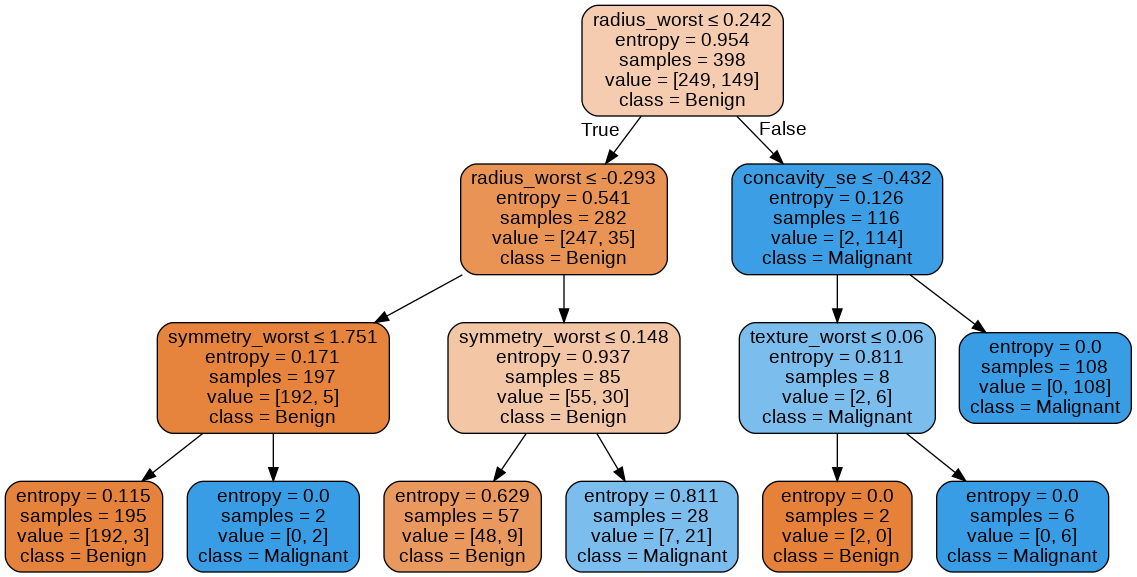

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
feature_names = X.columns
dot_data = StringIO()
export_graphviz(dec, out_file=dot_data, feature_names = feature_names, filled=True, rounded=True, special_characters=True, class_names=['Benign','Malignant'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## **ROC Curve Hypothesis**

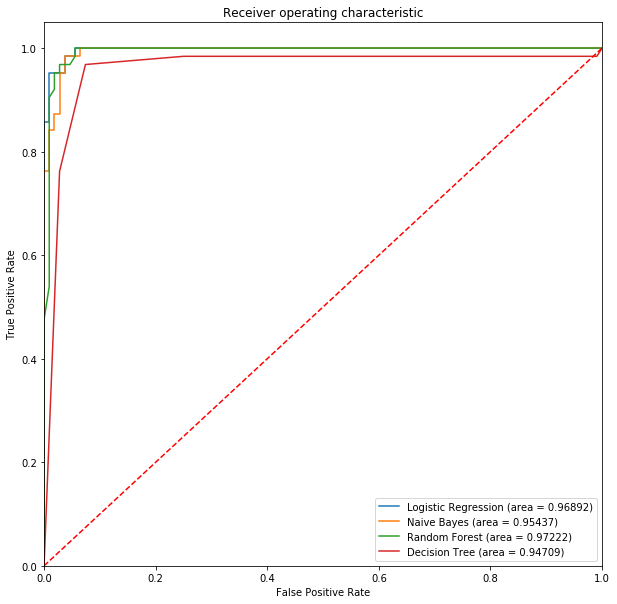

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_stdA))
NB_roc_auc = roc_auc_score(y_test1a, gnb.predict(X_test_stdB))
RF_roc_auc = roc_auc_score(y_test2a, rf.predict(X_test_stdC))
DEC_roc_auc = roc_auc_score(y_test3a, dec.predict(X_test_stdD))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_stdA)[::,1])
fpr1a, tpr1a, thresholds = roc_curve(y_test1a, gnb.predict_proba(X_test_stdB)[::,1])
fpr2a, tpr2a, thresholds = roc_curve(y_test2a, rf.predict_proba(X_test_stdC)[::,1])
fpr3a, tpr3a, thresholds = roc_curve(y_test3a, dec.predict_proba(X_test_stdD)[::,1])
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc_auc)
plt.plot(fpr1a, tpr1a, label='Naive Bayes (area = %0.5f)' % NB_roc_auc)
plt.plot(fpr2a, tpr2a, label='Random Forest (area = %0.5f)' % RF_roc_auc)
plt.plot(fpr3a, tpr3a, label='Decision Tree (area = %0.5f)' % DEC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn import svm
import sklearn.model_selection

scores_forest = sklearn.model_selection.cross_val_score(rf, X, y, cv =10)
print(np.mean(scores_forest), np.std(scores_forest))
print(scores_forest)

scores_log = sklearn.model_selection.cross_val_score(logreg, X, y, cv =10)
print(np.mean(scores_log), np.std(scores_log))
print(scores_log)

scores_tree = sklearn.model_selection.cross_val_score(dec, X, y, cv =10)
print(np.mean(scores_tree), np.std(scores_tree))
print(scores_tree)

scores_nb = sklearn.model_selection.cross_val_score(gnb, X, y, cv =10)
print(np.mean(scores_nb), np.std(scores_nb))
print(scores_nb)

0.9544410595454152 0.025797610056311128
[0.98275862 0.89655172 0.92982456 0.94736842 0.98245614 0.94736842
 0.94736842 0.96428571 0.96428571 0.98214286]
0.9295663728286232 0.030038930889732123
[0.94827586 0.93103448 0.9122807  0.94736842 0.92982456 0.92982456
 0.96491228 0.91071429 0.85714286 0.96428571]
0.9264281393138016 0.029458753029235122
[0.93103448 0.86206897 0.89473684 0.9122807  0.94736842 0.94736842
 0.9122807  0.94642857 0.96428571 0.94642857]
0.9297845907873132 0.03388168621898236
[0.98275862 0.87931034 0.87719298 0.94736842 0.9122807  0.92982456
 0.92982456 0.96428571 0.96428571 0.91071429]


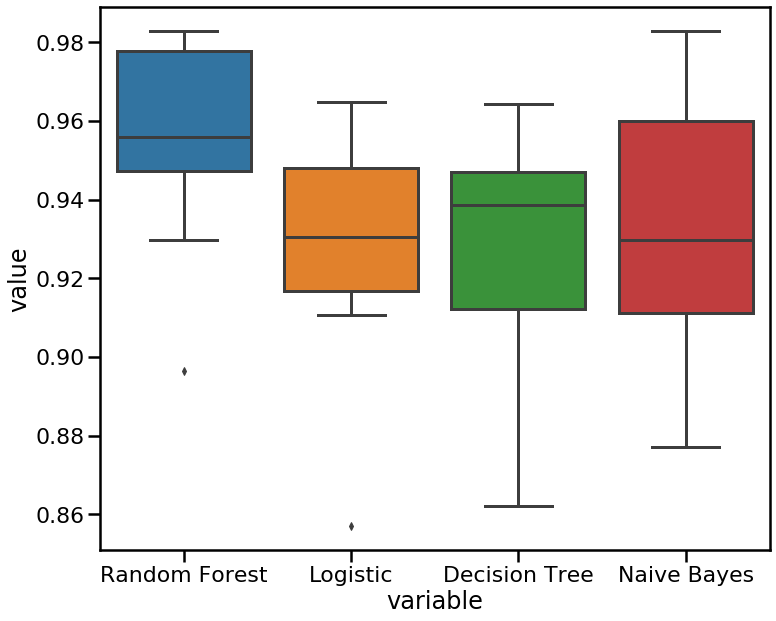

In [ ]:
dfs = pd.DataFrame(data = list(zip(scores_forest, scores_log, scores_tree, scores_nb)), columns = ['Random Forest','Logistic','Decision Tree','Naive Bayes'])
plt.figure(figsize=(12,10))
sns.set_context('poster')
sns.boxplot(x="variable", y="value", data=pd.melt(dfs)) #pd.melt converts a wide-form dataframe to a long-form


## **Feature Selection**

## **Logistic Regression**

In [ ]:
X1 = data[['radius_mean','perimeter_mean','concave points_mean',
           'concavity_mean','radius_worst','perimeter_worst','concave points_worst']]
y1 = data['Diagnosis_classify']
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.3, random_state = 0) #70%train 30%test
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train1)
X_test_std = scaler.transform(X_test1)

In [ ]:
# import the class (LOG)
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg1 = LogisticRegression(random_state = 0)

# fit the model with data
logreg1.fit(X_train_std,y_train1)

#
y_pred1=logreg1.predict(X_test_std)
y_pred1

from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred1))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test1, y_pred1)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
print("Precision:",metrics.precision_score(y_test1, y_pred1))
print("Recall:",metrics.recall_score(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

[[104   4]
 [  6  57]]
Accuracy: 0.9415204678362573
Precision: 0.9344262295081968
Recall: 0.9047619047619048


## **Naive Bayes**

In [ ]:
X1 = data[['radius_mean','perimeter_mean','concave points_mean',
           'concavity_mean','radius_worst','perimeter_worst','concave points_worst']]
y1 = data['Diagnosis_classify']
X_train1b,X_test1b,y_train1b,y_test1b = train_test_split(X1,y1,test_size=0.3, random_state = 0) #70%train 30%test
scaler = StandardScaler()

X_train_std1b = scaler.fit_transform(X_train1b)
X_test_std1b = scaler.transform(X_test1b)

In [ ]:
#Import Gaussian Naive Bayes model (NB)
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb1 = GaussianNB()

#Train the model using the training sets
gnb1.fit(X_train_std1b, y_train1b)

#Predict the response for test dataset
y_pred1b = gnb1.predict(X_test_std1b)
print(y_pred1b)
from sklearn.metrics import classification_report
print(classification_report(y_test1b,y_pred1b))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test1b, y_pred1b)
print(cnf_matrix)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1b, y_pred1b))

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       108
           1       0.91      0.92      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

[[102   6]
 [  5  58]]
Accuracy: 0.935672514619883


## **Random Forest**

In [ ]:
X1 = data[['radius_mean','perimeter_mean','concave points_mean',
           'concavity_mean','radius_worst','perimeter_worst','concave points_worst']]
y1 = data['Diagnosis_classify']
X_train2b,X_test2b,y_train2b,y_test2b = train_test_split(X1,y1,test_size=0.3, random_state = 0) #70%train 30%test
scaler = StandardScaler()

X_train_std1c = scaler.fit_transform(X_train2b)
X_test_std1c = scaler.transform(X_test2b)

In [ ]:
#Import Random Forest Model (RF)
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf1 = RandomForestClassifier(n_estimators=100, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf1.fit(X_train_std1c,y_train2b)

y_pred2b = rf1.predict(X_test_std1c)
print(y_pred2b)
from sklearn.metrics import classification_report
print(classification_report(y_test2b,y_pred2b))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test2b, y_pred2b)
print(cnf_matrix)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2b, y_pred2b))
print("Precision:",metrics.precision_score(y_test2b, y_pred2b))
print("Recall:",metrics.recall_score(y_test2b, y_pred2b))

[1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

[[104   4]
 [  5  58]]
Accuracy: 0.9473684210526315
Precision: 0.9354838709677419
Recall: 0.9206349206349206


## **Decision Tree**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X1 = data[['radius_mean','perimeter_mean','concave points_mean',
           'concavity_mean','radius_worst','perimeter_worst','concave points_worst']]
y1 = data['Diagnosis_classify']
X_train3b, X_test3b, y_train3b, y_test3b = train_test_split(X1, y1, test_size=0.3, random_state = 0) # 70% training and 30% test
scaler = StandardScaler()

X_train_std1d = scaler.fit_transform(X_train3b)
X_test_std1d = scaler.transform(X_test3b)

In [ ]:
# Create Decision Tree classifer object
dec1 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)

# Train Decision Tree Classifer
dec1 = dec1.fit(X_train_std1d,y_train3b)

#Predict the response for test dataset
y_pred3b = dec1.predict(X_test_std1d)
print(y_pred3b)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3b, y_pred3b))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test3b, y_pred3b)
print(cnf_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test3b,y_pred3b))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0]
Accuracy: 0.9181286549707602
[[107   1]
 [ 13  50]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       108
           1       0.98      0.79      0.88        63

    accuracy                           0.92       171
   macro avg       0.94      0.89      0.91       171
weighted avg       0.92      0.92      0.92       171



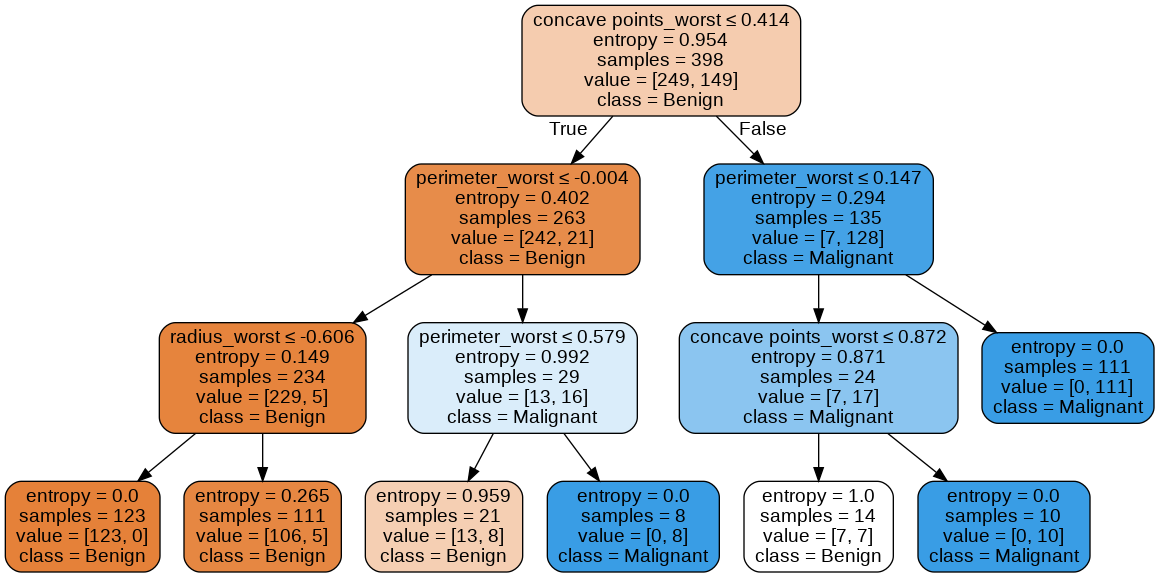

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
feature_names = X1.columns
dot_data = StringIO()
export_graphviz(dec1, out_file=dot_data, feature_names = feature_names, filled=True, rounded=True, special_characters=True, class_names=['Benign','Malignant'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

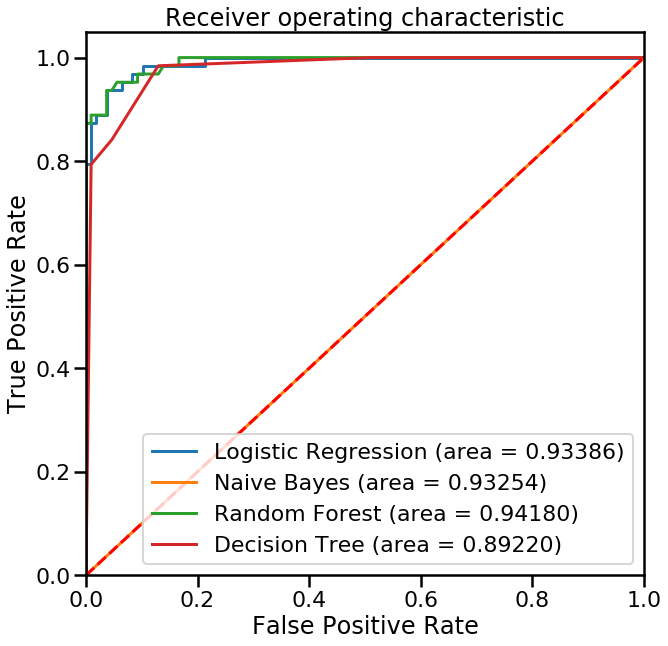

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test1, logreg1.predict(X_test_std))
NB_roc_auc = roc_auc_score(y_test1b, gnb1.predict(X_test_std1b))
RF_roc_auc = roc_auc_score(y_test2b, rf1.predict(X_test_std1c))
DEC_roc_auc = roc_auc_score(y_test3b, dec1.predict(X_test_std1d))
fpr, tpr, thresholds = roc_curve(y_test1, logreg1.predict_proba(X_test_std1b)[:,1])
fpr1b, tpr1b, thresholds = roc_curve(y_test1b, gnb1.predict_proba(X_test1b)[:,1])
fpr2b, tpr2b, thresholds = roc_curve(y_test2b, rf1.predict_proba(X_test_std1c)[:,1])
fpr3b, tpr3b, thresholds = roc_curve(y_test3b, dec1.predict_proba(X_test_std1d)[:,1])
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc_auc)
plt.plot(fpr1b, tpr1b, label='Naive Bayes (area = %0.5f)' % NB_roc_auc)
plt.plot(fpr2b, tpr2b, label='Random Forest (area = %0.5f)' % RF_roc_auc)
plt.plot(fpr3b, tpr3b, label='Decision Tree (area = %0.5f)' % DEC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



In [ ]:
from sklearn import svm
import sklearn.model_selection

scores_forest1 = sklearn.model_selection.cross_val_score(rf1, X1, y1, cv =10)
print(np.mean(scores_forest1), np.std(scores_forest1))
print(scores_forest1)

scores_log1 = sklearn.model_selection.cross_val_score(logreg1, X1, y1, cv =10)
print(np.mean(scores_log1), np.std(scores_log1))
print(scores_log1)

scores_tree1 = sklearn.model_selection.cross_val_score(dec1, X1, y1, cv =10)
print(np.mean(scores_tree1), np.std(scores_tree1))
print(scores_tree1)

scores_nb1 = sklearn.model_selection.cross_val_score(gnb1, X1, y1, cv =10)
print(np.mean(scores_nb1), np.std(scores_nb1))
print(scores_nb1)

0.9439741595367728 0.032604692576585874
[0.94827586 0.87931034 0.89473684 0.94736842 0.96491228 0.98245614
 0.92982456 0.98214286 0.94642857 0.96428571]
0.945576225045372 0.016359295672744946
[0.96551724 0.93103448 0.94736842 0.94736842 0.94736842 0.92982456
 0.9122807  0.94642857 0.96428571 0.96428571]
0.9141161092386136 0.038301301476805015
[0.93103448 0.86206897 0.84210526 0.94736842 0.87719298 0.92982456
 0.9122807  0.94642857 0.96428571 0.92857143]
0.9387401693889897 0.03882262548756301
[0.94827586 0.84482759 0.94736842 0.94736842 0.94736842 0.96491228
 0.9122807  0.98214286 0.91071429 0.98214286]


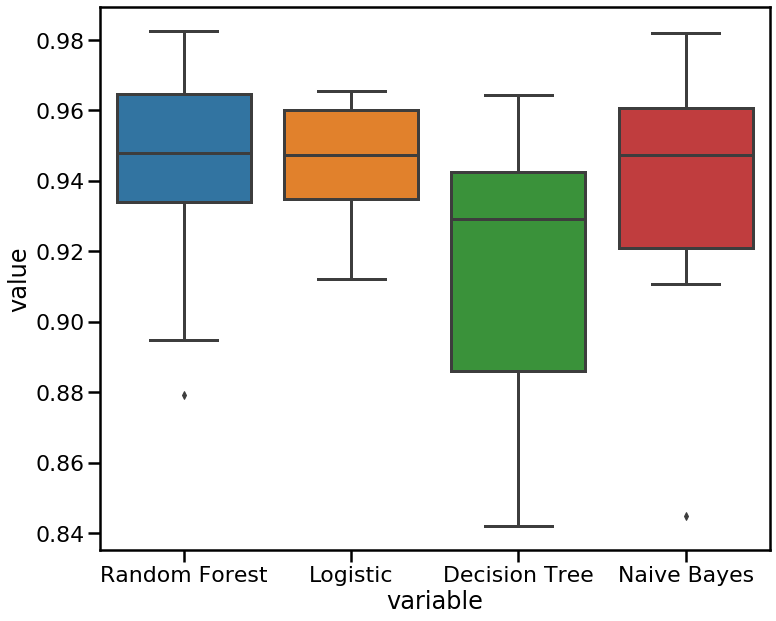

In [ ]:
dfs = pd.DataFrame(data = list(zip(scores_forest1, scores_log1, scores_tree1, scores_nb1)), columns = ['Random Forest','Logistic','Decision Tree','Naive Bayes'])
plt.figure(figsize=(12,10))
sns.set_context('poster')
sns.boxplot(x="variable", y="value", data=pd.melt(dfs)) #pd.melt converts a wide-form dataframe to a long-form


## **Feature Selection 2**

## **Logistic Regression**

In [ ]:
X2 = data[['radius_mean','perimeter_mean','concave points_mean','concavity_mean','radius_worst',
           'perimeter_worst','concave points_worst','area_worst','texture_worst']]
y2 = data['Diagnosis_classify']
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.3, random_state = 0) #70%train 30%test
scaler = StandardScaler()

X_train_std2A = scaler.fit_transform(X_train)
X_test_std2A = scaler.transform(X_test)

In [ ]:
# import the class (LOG)
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg2 = LogisticRegression(random_state = 0)

# fit the model with data
logreg2.fit(X_train_std2A,y_train)

#
THRESHOLD = 0.5 # new
y_pred = np.where(logreg2.predict_proba(X_test_std2A)[:,1] > THRESHOLD, 1, 0) # new
y_pred = logreg2.predict(X_test_std2A)
print(y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

[[106   2]
 [  2  61]]
Accuracy: 0.9766081871345029
Precision: 0.9682539682539683
Recall: 0.9682539682539683


## **Naive Bayes**

In [ ]:
X2 = data[['radius_mean','perimeter_mean','concave points_mean','concavity_mean','radius_worst',
           'perimeter_worst','concave points_worst','area_worst','texture_worst']]
y2 = data['Diagnosis_classify']
X_train1c,X_test1c,y_train1c,y_test1c = train_test_split(X2,y2,test_size=0.3, random_state = 0) #70%train 30%test
scaler = StandardScaler()

X_train_std2B = scaler.fit_transform(X_train1c)
X_test_std2B = scaler.transform(X_test1c)

In [ ]:
#Import Gaussian Naive Bayes model (NB)
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb2 = GaussianNB()

#Train the model using the training sets
gnb2.fit(X_train_std2B, y_train1c)

#Predict the response for test dataset
y_pred1c = gnb2.predict(X_test_std2B)
print(y_pred1c)
from sklearn.metrics import classification_report
print(classification_report(y_test1c,y_pred1c))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test1c, y_pred1c)
print(cnf_matrix)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1c, y_pred1c))

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.91      0.95      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

[[102   6]
 [  3  60]]
Accuracy: 0.9473684210526315


## **Random Forest**

In [ ]:
X2 = data[['radius_mean','perimeter_mean','concave points_mean','concavity_mean','radius_worst',
           'perimeter_worst','concave points_worst','area_worst','texture_worst']]
y2 = data['Diagnosis_classify']
X_train2c,X_test2c,y_train2c,y_test2c = train_test_split(X2,y2,test_size=0.3, random_state = 0) #70%train 30%test
scaler = StandardScaler()

X_train_std2C = scaler.fit_transform(X_train2c)
X_test_std2C = scaler.transform(X_test2c)

In [ ]:
#Import Random Forest Model (RF)
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf2 = RandomForestClassifier(n_estimators=100, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf2.fit(X_train_std2C,y_train2c)

y_pred2c = rf2.predict(X_test_std2C)
print(y_pred2c)
from sklearn.metrics import classification_report
print(classification_report(y_test2c,y_pred2c))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test2c, y_pred2c)
print(cnf_matrix)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2c, y_pred2c))
print("Precision:",metrics.precision_score(y_test2c, y_pred2c))
print("Recall:",metrics.recall_score(y_test2c, y_pred2c))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[106   2]
 [  3  60]]
Accuracy: 0.9707602339181286
Precision: 0.967741935483871
Recall: 0.9523809523809523


## **Decision Tree**

In [ ]:
X2 = data[['radius_mean','perimeter_mean','concave points_mean','concavity_mean','radius_worst',
           'perimeter_worst','concave points_worst','area_worst','texture_worst']]
y2 = data['Diagnosis_classify']
X_train3c,X_test3c,y_train3c,y_test3c = train_test_split(X2,y2,test_size=0.3, random_state = 0) #70%train 30%test
scaler = StandardScaler()

X_train_std2D = scaler.fit_transform(X_train3c)
X_test_std2D = scaler.transform(X_test3c)

In [ ]:
# Create Decision Tree classifer object
dec2 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)

# Train Decision Tree Classifer
dec2 = dec2.fit(X_train_std2D,y_train3c)

#Predict the response for test dataset
y_pred3c = dec2.predict(X_test_std2D)
print(y_pred3c)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3c, y_pred3c))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test3c, y_pred3c)
print(cnf_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test3c,y_pred3c))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0]
Accuracy: 0.9473684210526315
[[100   8]
 [  1  62]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       108
           1       0.89      0.98      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.94       171
weighted avg       0.95      0.95      0.95       171



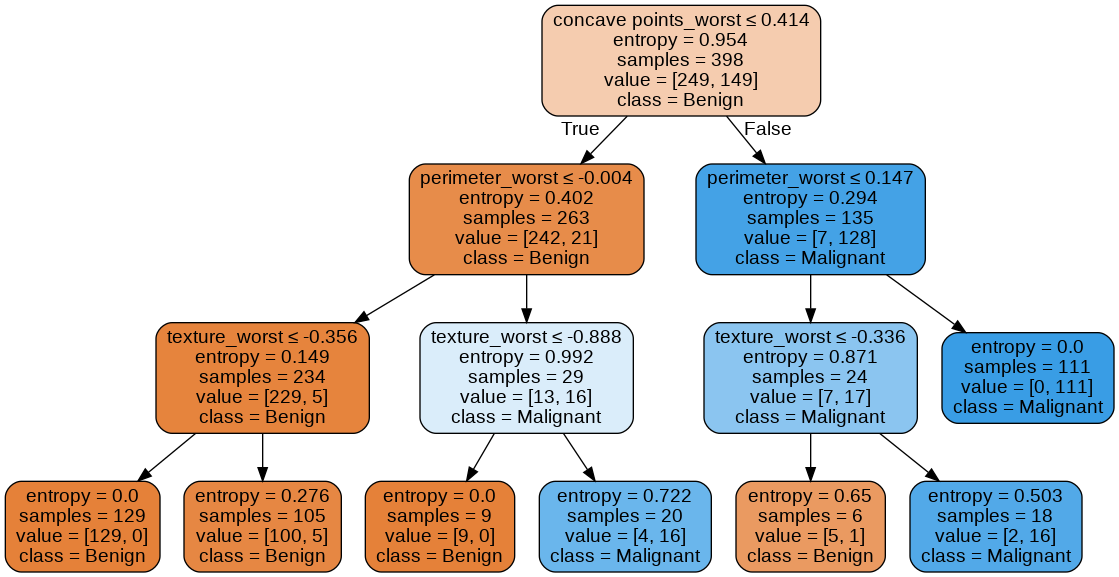

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
feature_names = X2.columns
dot_data = StringIO()
export_graphviz(dec2, out_file=dot_data, feature_names = feature_names, filled=True, rounded=True, special_characters=True, class_names=['Benign','Malignant'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

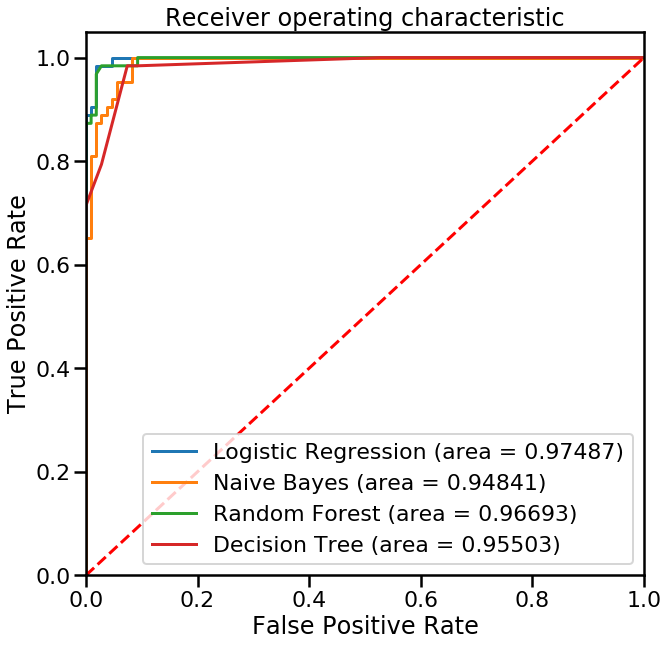

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg2.predict(X_test_std2A))
NB_roc_auc = roc_auc_score(y_test1c, gnb2.predict(X_test_std2B))
RF_roc_auc = roc_auc_score(y_test2c, rf2.predict(X_test_std2C))
DEC_roc_auc = roc_auc_score(y_test3c, dec2.predict(X_test_std2D))
fpr, tpr, thresholds = roc_curve(y_test, logreg2.predict_proba(X_test_std2A)[:,1])
fpr1c, tpr1c, thresholds = roc_curve(y_test1c, gnb2.predict_proba(X_test_std2B)[:,1])
fpr2c, tpr2c, thresholds = roc_curve(y_test2c, rf2.predict_proba(X_test_std2C)[:,1])
fpr3c, tpr3c, thresholds = roc_curve(y_test3c, dec2.predict_proba(X_test_std2D)[:,1])
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc_auc)
plt.plot(fpr1c, tpr1c, label='Naive Bayes (area = %0.5f)' % NB_roc_auc)
plt.plot(fpr2c, tpr2c, label='Random Forest (area = %0.5f)' % RF_roc_auc)
plt.plot(fpr3c, tpr3c, label='Decision Tree (area = %0.5f)' % DEC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [ ]:
from sklearn import svm
import sklearn.model_selection

scores_forest2 = sklearn.model_selection.cross_val_score(rf2, X2, y2, cv =10)
print(np.mean(scores_forest2), np.std(scores_forest2))
print(scores_forest2)

scores_log2 = sklearn.model_selection.cross_val_score(logreg2, X2, y2, cv =10)
print(np.mean(scores_log2), np.std(scores_log2))
print(scores_log2)

scores_tree2 = sklearn.model_selection.cross_val_score(dec2, X2, y2, cv =10)
print(np.mean(scores_tree2), np.std(scores_tree2))
print(scores_tree2)

scores_nb2 = sklearn.model_selection.cross_val_score(gnb2, X2, y2, cv =10)
print(np.mean(scores_nb2), np.std(scores_nb2))
print(scores_nb2)

0.9615201797597441 0.025266171738395127
[0.96551724 0.89655172 0.94736842 0.94736842 0.98245614 0.98245614
 0.96491228 0.98214286 0.96428571 0.98214286]
0.9525613602972948 0.02494571752206516
[0.94827586 0.93103448 0.92982456 0.94736842 1.         0.98245614
 0.94736842 0.91071429 0.96428571 0.96428571]
0.9351395730706076 0.029081480103103644
[0.93103448 0.89655172 0.89473684 0.9122807  0.98245614 0.92982456
 0.94736842 0.98214286 0.92857143 0.94642857]
0.9440044075706508 0.03757427362297491
[0.96551724 0.84482759 0.94736842 0.92982456 0.96491228 0.94736842
 0.94736842 0.98214286 0.92857143 0.98214286]


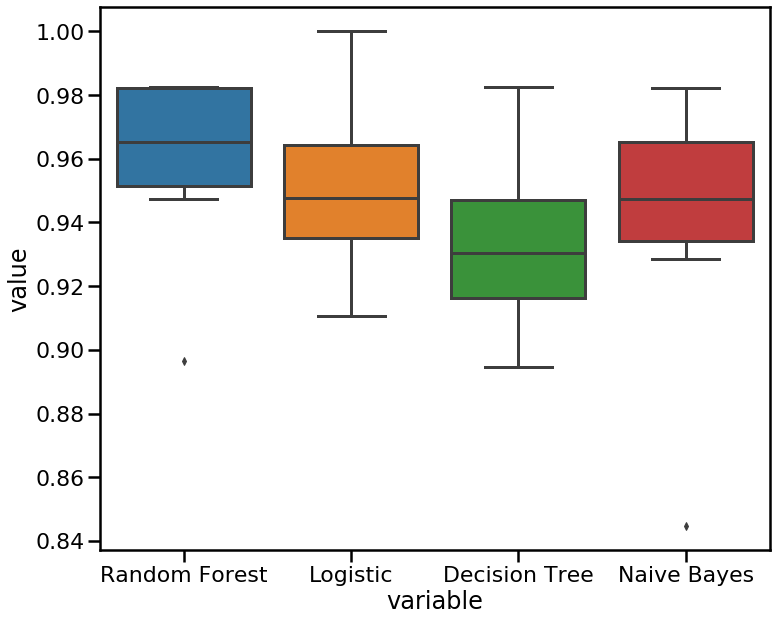

In [ ]:
dfs = pd.DataFrame(data = list(zip(scores_forest2, scores_log2, scores_tree2, scores_nb2)), columns = ['Random Forest','Logistic','Decision Tree','Naive Bayes'])
plt.figure(figsize=(12,10))
sns.set_context('poster')
sns.boxplot(x="variable", y="value", data=pd.melt(dfs)) #pd.melt converts a wide-form dataframe to a long-form


## **ROC for RF Baseline 2**

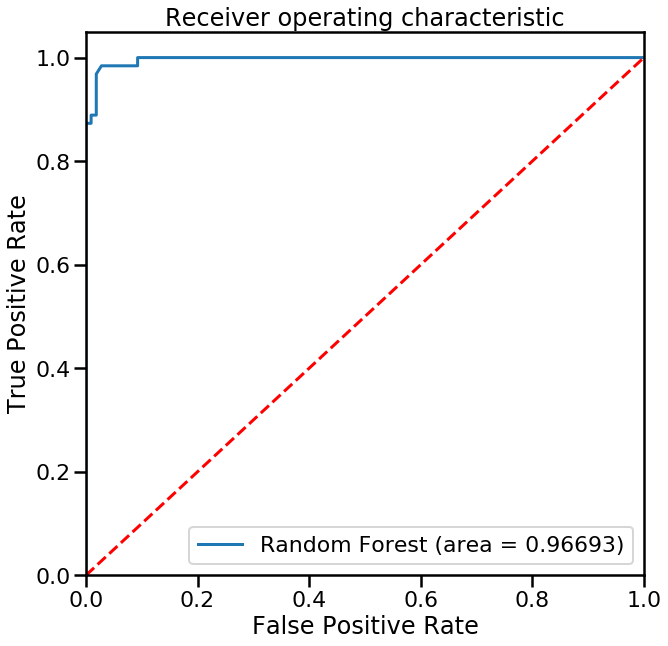

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc = roc_auc_score(y_test2c, rf2.predict(X_test_std2C))
fpr2c, tpr2c, thresholds = roc_curve(y_test2c, rf2.predict_proba(X_test_std2C)[:,1])
plt.figure(figsize=(10,10))
plt.plot(fpr2c, tpr2c, label='Random Forest (area = %0.5f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


## **BoxPlot for Logistic Regression**

In [ ]:
scores_rf = sklearn.model_selection.cross_val_score(rf, X, y, cv =10)
print(np.mean(scores_rf), np.std(scores_rf))
print(scores_rf)

scores_rf1 = sklearn.model_selection.cross_val_score(rf1, X1, y1, cv =10)
print(np.mean(scores_rf1), np.std(scores_rf1))
print(scores_rf1)

scores_rf2 = sklearn.model_selection.cross_val_score(rf2, X2, y2, cv =10)
print(np.mean(scores_rf2), np.std(scores_rf2))
print(scores_rf2)

0.9544410595454152 0.025797610056311128
[0.98275862 0.89655172 0.92982456 0.94736842 0.98245614 0.94736842
 0.94736842 0.96428571 0.96428571 0.98214286]
0.9439741595367728 0.032604692576585874
[0.94827586 0.87931034 0.89473684 0.94736842 0.96491228 0.98245614
 0.92982456 0.98214286 0.94642857 0.96428571]
0.9615201797597441 0.025266171738395127
[0.96551724 0.89655172 0.94736842 0.94736842 0.98245614 0.98245614
 0.96491228 0.98214286 0.96428571 0.98214286]


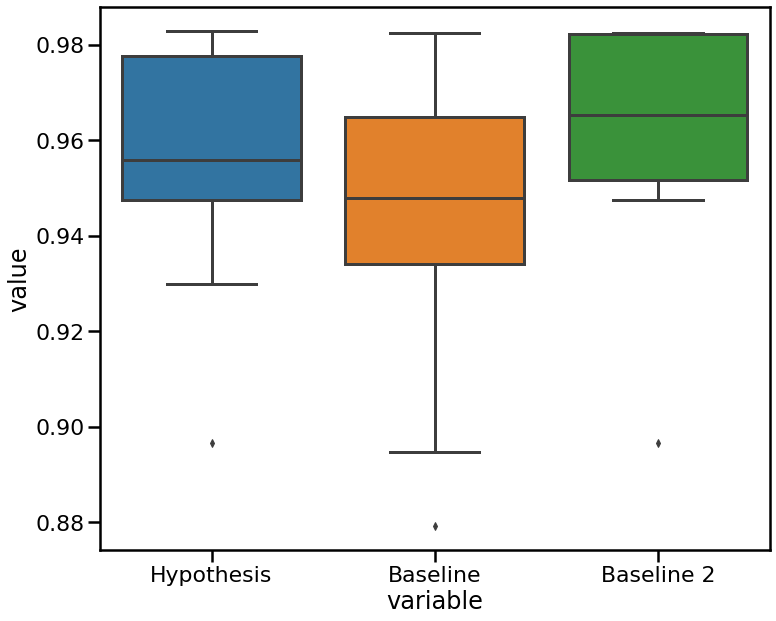

In [ ]:
dfs1 = pd.DataFrame(data = list(zip(scores_rf, scores_rf1, scores_rf2)), columns = ['Hypothesis','Baseline','Baseline 2'])
plt.figure(figsize=(12,10))
sns.set_context('poster')
sns.boxplot(x="variable", y="value", data=pd.melt(dfs1)) #pd.melt converts a wide-form dataframe to a long-form


0.9544410595454152 0.025797610056311128
[0.98275862 0.89655172 0.92982456 0.94736842 0.98245614 0.94736842
 0.94736842 0.96428571 0.96428571 0.98214286]
0.9615201797597441 0.025266171738395127
[0.96551724 0.89655172 0.94736842 0.94736842 0.98245614 0.98245614
 0.96491228 0.98214286 0.96428571 0.98214286]


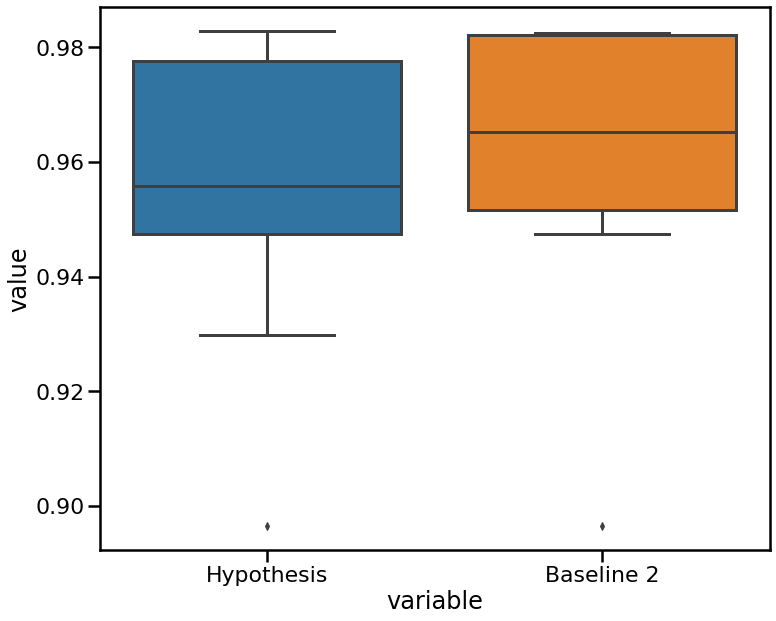

In [ ]:
scores_rf = sklearn.model_selection.cross_val_score(rf, X, y, cv =10)
print(np.mean(scores_rf), np.std(scores_rf))
print(scores_rf)

scores_rf2 = sklearn.model_selection.cross_val_score(rf2, X2, y2, cv =10)
print(np.mean(scores_rf2), np.std(scores_rf2))
print(scores_rf2)

dfs2 = pd.DataFrame(data = list(zip(scores_rf, scores_rf2)), columns = ['Hypothesis','Baseline 2'])
plt.figure(figsize=(12,10))
sns.set_context('poster')
sns.boxplot(x="variable", y="value", data=pd.melt(dfs2)) #pd.melt converts a wide-form dataframe to a long-form


In [ ]:
feature_imortance = pd.DataFrame(rf.feature_importances_,
                                 index = X_train2a.columns,
                                 columns = ['importance']).sort_values('importance', ascending = False)

In [ ]:
feature_imortance.head(5)

,importance
radius_worst,0.403920
radius_mean,0.162685
radius_se,0.118591
symmetry_worst,0.092233
texture_mean,0.053826
